# TP Diamants

<img src="https://cdn.pixabay.com/photo/2016/02/08/07/42/diamond-1186139__340.jpg">

**Lignes directrices**

Ce dataset classique contient les prix et autres attributs de près de 54 000 diamants. C'est un excellent ensemble de données pour les débutants qui apprennent à travailler avec l'analyse et la visualisation de données et utilise des modèles d'apprentissage automatique supervisés.

> Vous pouvez télécharger le jeu de données ici: https://www.kaggle.com/shivam2503/diamonds

**Contenu**

- prix en dollars américains (\ $ 326 - \ $ 18,823)

- poids en carats du diamant (0,2-5,01)

- qualité de coupe de la coupe (Fair, Good, Very Good, Premium, Ideal)

- couleur du diamant, de J (pire) à D (meilleur)

- mesure de la clarté du diamant (I1 (pire), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (meilleur))

- x longueur en mm (0--10,74)

- y largeur en mm (0-58,9)

- z profondeur en mm (0--31,8)

- profondeur pourcentage de profondeur totale = z / mean(x, y) = 2 * z / (x + y) (43--79)

- largeur du tableau du haut du losange par rapport au point le plus large (43--95)

### OBJECTIF : PREDICTION DES PRIX DE DIAMANTS

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score , mean_squared_error
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

### Import des données 
Téléchargement des données et les importer dans une dataframe pandas. Vérifions que les données sont correctement chargées.

In [5]:
df = pd.read_csv('data/diamonds.csv', index_col=0)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### Nettoyage

Vérifions la présence de valeurs nulles et les gérer le cas échéant.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [7]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [8]:
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

### Boites à moustache des données qualitatives

Effectuer l'analyse des données qualitatives via l'utilisation de boîtes à moustaches (boxplot)

In [9]:
print("Nb. doublons :", df.duplicated().sum()) 


Nb. doublons : 146


In [10]:
# Présence de 146 doublons : on les supprime
# Attention a bien supprimer la colonne d'index avant de verifier 
# la présence de doublons !
df.drop_duplicates(inplace=True)

In [11]:
#verification que les doublons sont bien supprimés 
df.duplicated().sum()

0

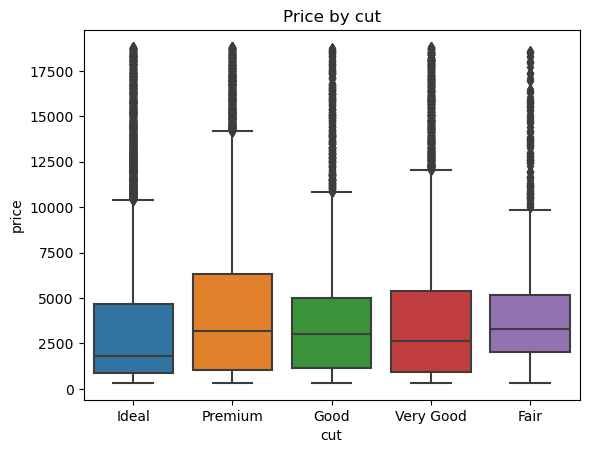

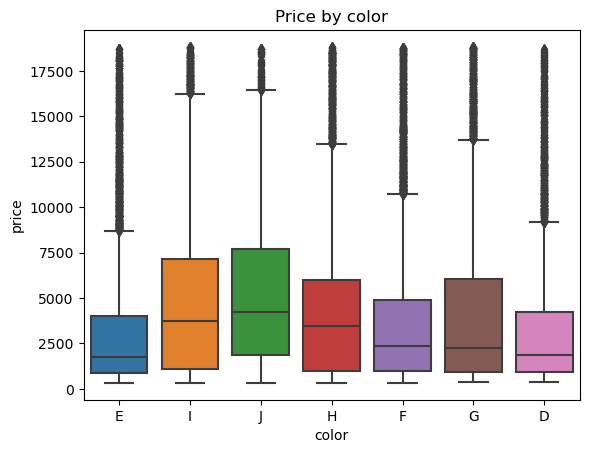

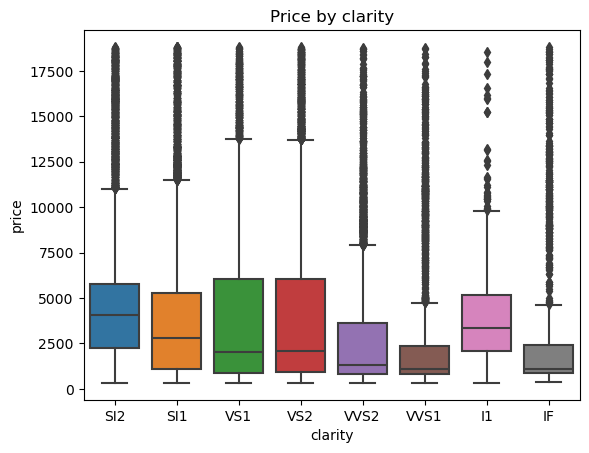

In [12]:
# Les boites à moustache des données qualitatives
cat_feat = ['cut', 'color', 'clarity']
for col in cat_feat:
    sns.boxplot(x=df[col], y=df['price'])
    plt.title('Price by '+ col)
    plt.show()

### Visualisations des features

Réalisons l'analyse exploratoire du jeu de données, on attachera comme d'habitude de l'importance aux graphiques pour qu'ils soient compréhensbiles.

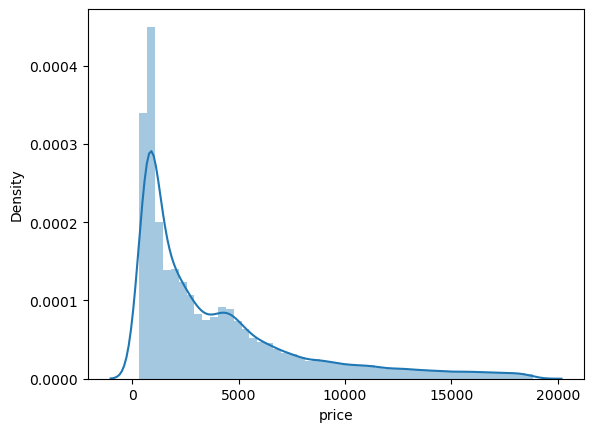

Skewness : 1.618239898265432
Kurtosis : 2.1784530585226896


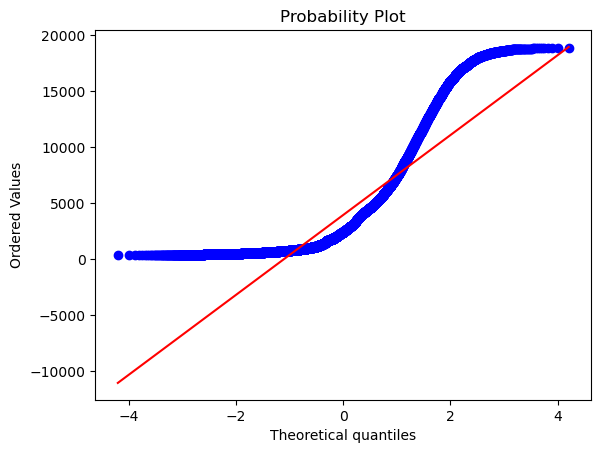

In [13]:
# Description de la colonne price pour commencer :
from scipy.stats import probplot
sns.distplot(df.price)
plt.show()
probplot(df.price, plot=plt)
print("Skewness :", df.price.skew())
print("Kurtosis :", df.price.kurt())

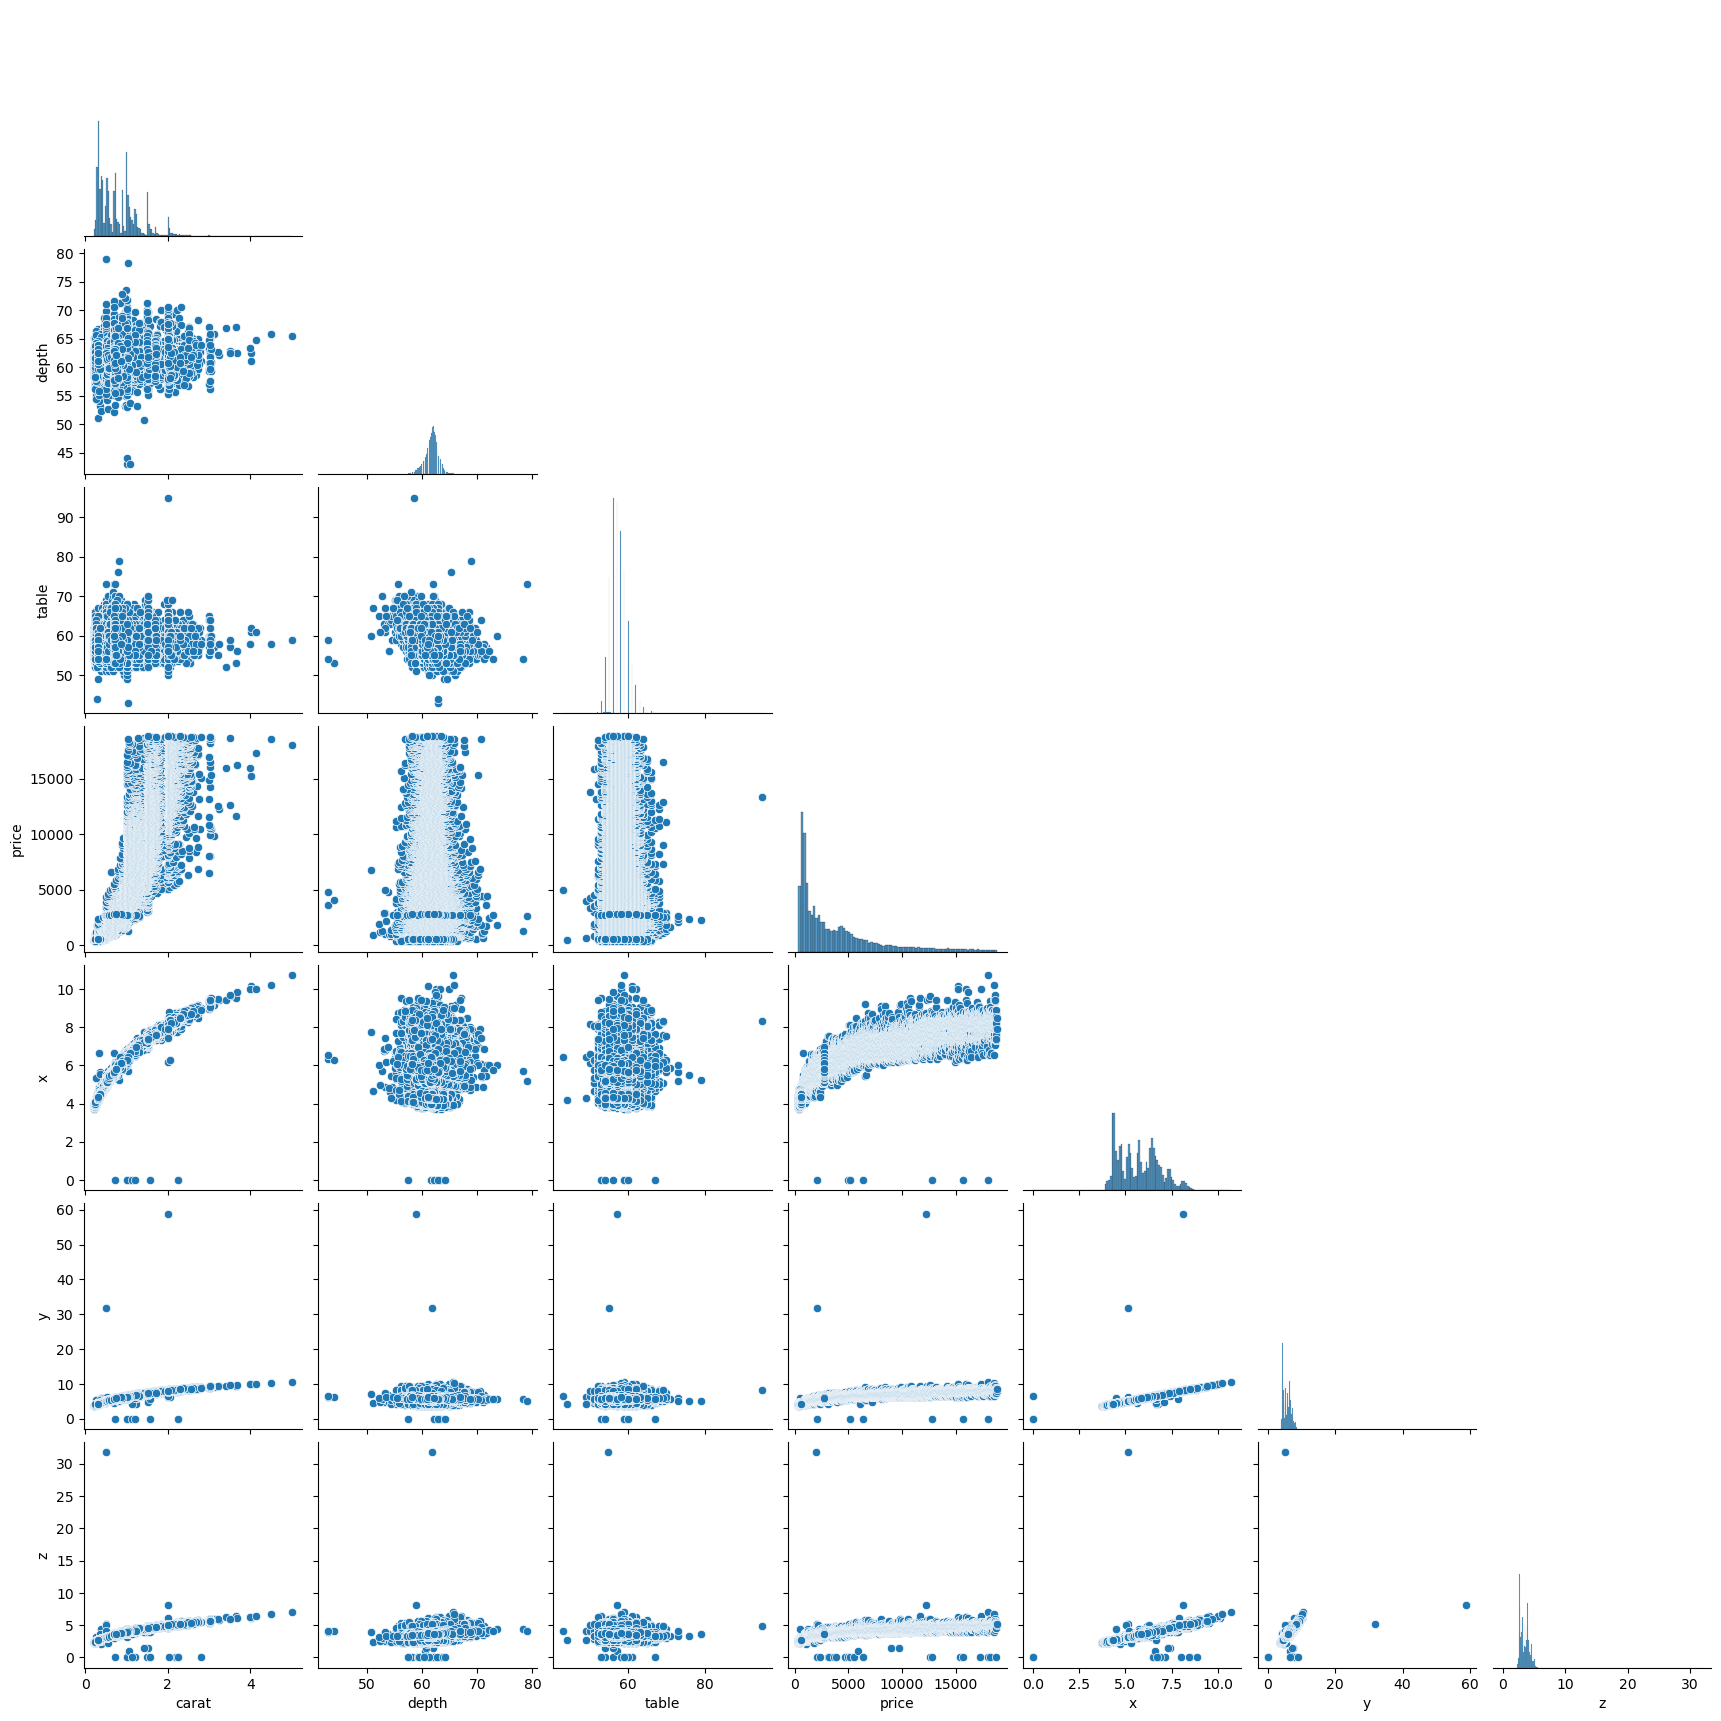

In [14]:
# Regardons la relation de price avec les valeurs numériques :
sns.pairplot(df, corner=True)

In [ ]:
# Premières conclusions :

# Price et Carrats ont l'air linéairement (exponentiellement ?) reliés.
# Price et x ont l'air linéairement lié, 
#   ce qui est normal vu que x est très fortement 
#   lié linéairement avec Carat.
# Des outliers en y et z nous empêchent de voir les corrélations potentielles.
# Les autres features ne semblent pas linéairement liées au prix.

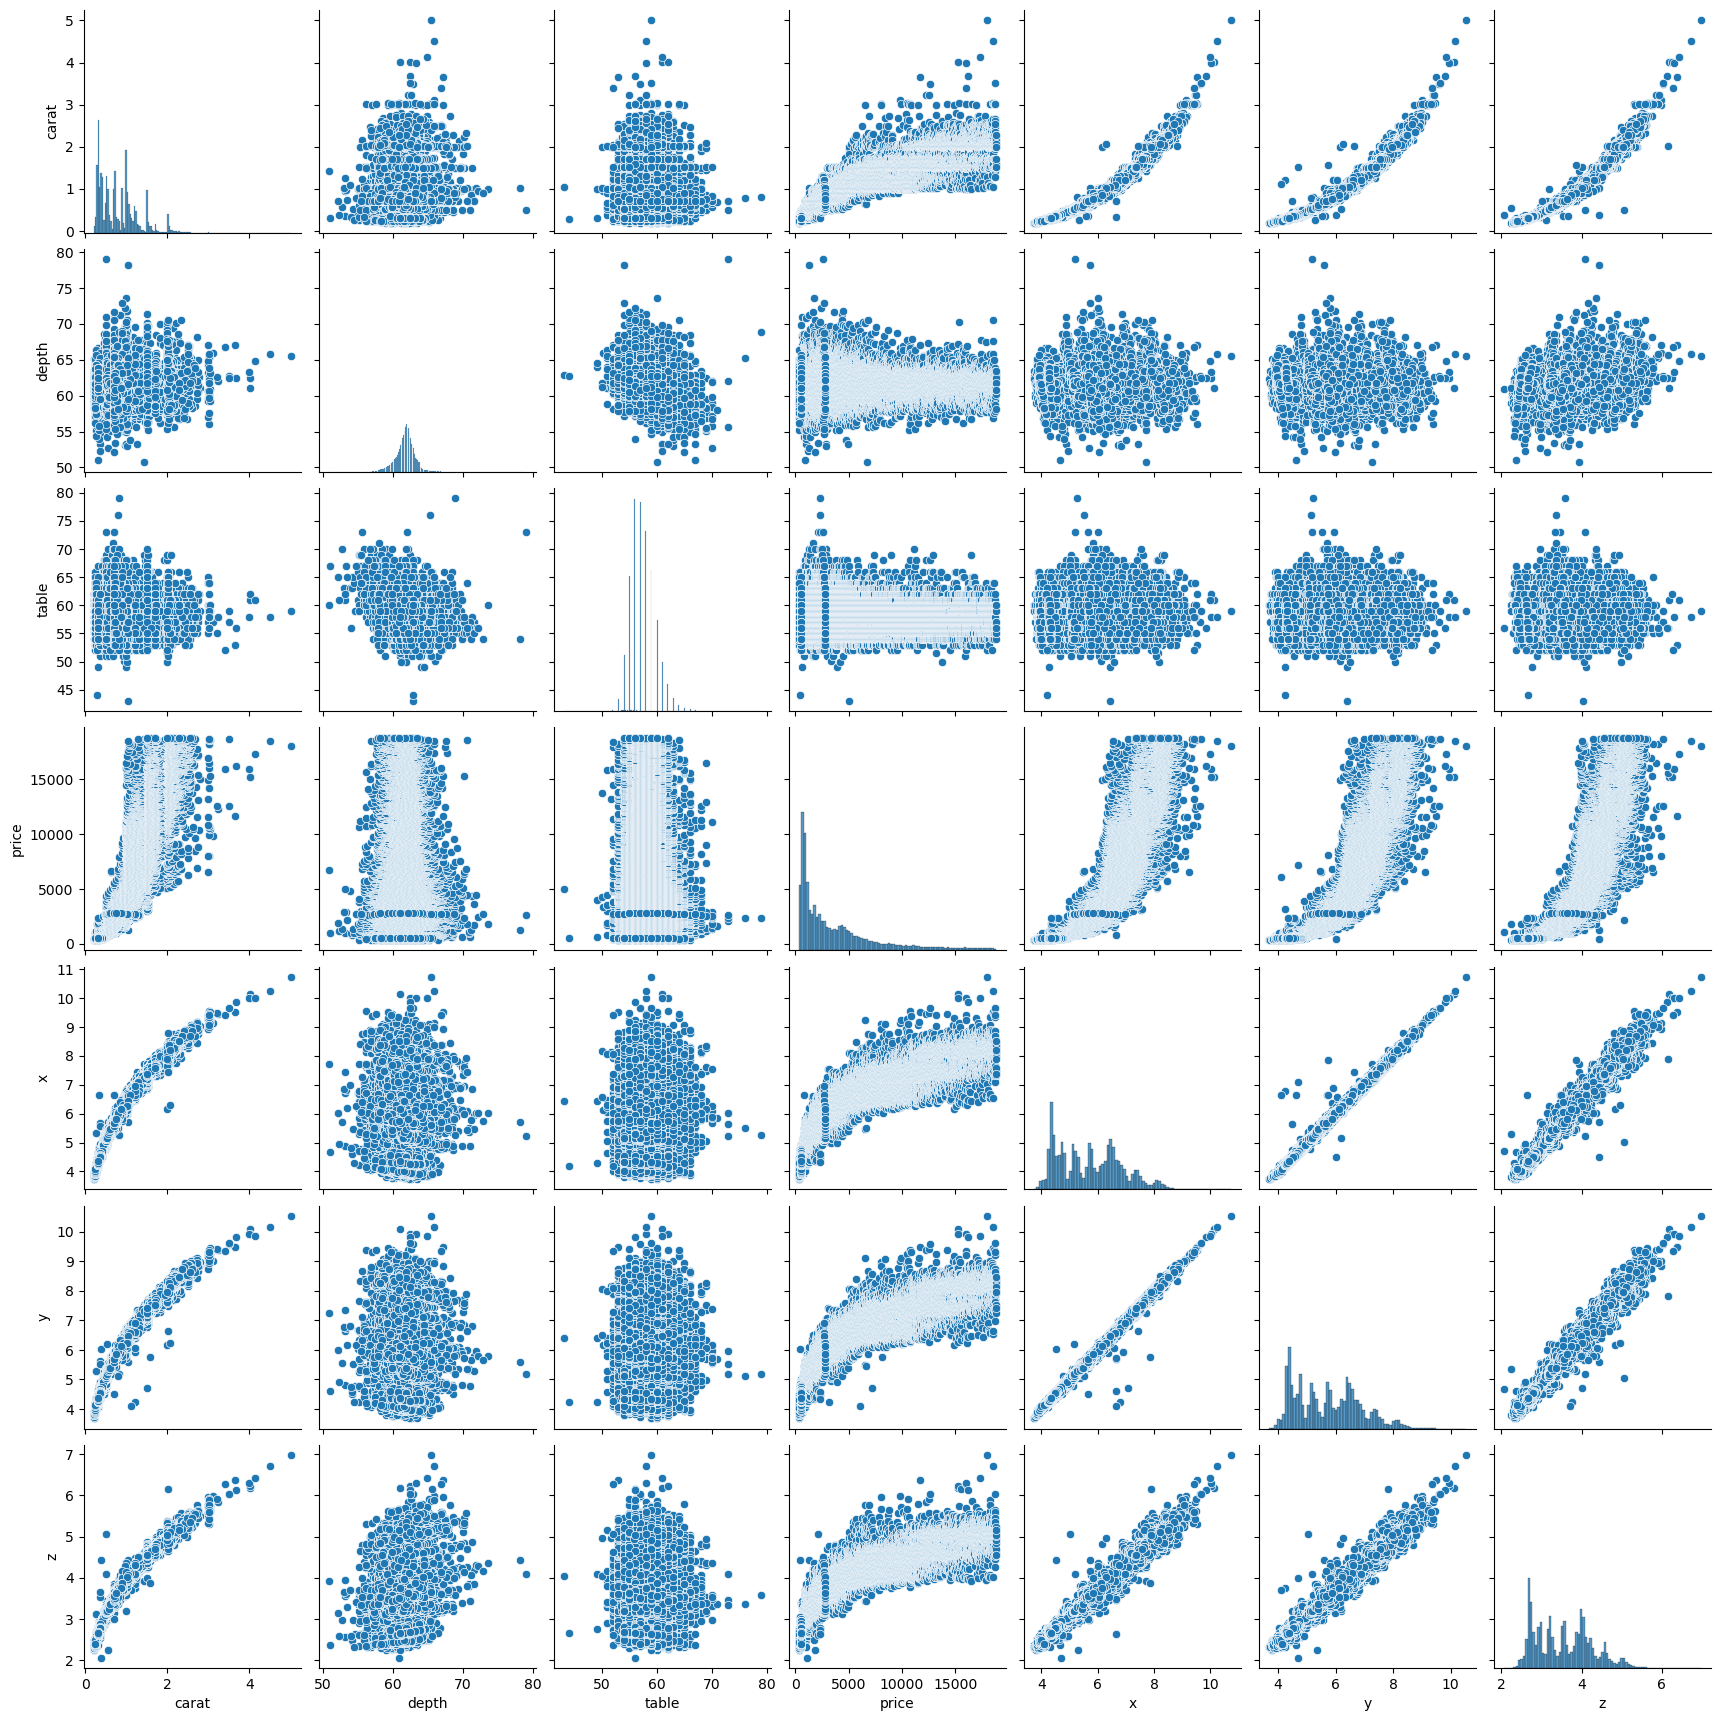

In [15]:
am1 = df["z"]<25
am4 = df["z"]>2
am2 = df["x"]>2
am3 = df["y"]<28
am5 = df["depth"]>48
am6 = df["table"]<82
dfam = df[am1 & am2 & am3 & am4 & am5 & am6]
sns.pairplot(dfam)

In [ ]:
# A priori des outliers dans x, y, z, 
# avant de les gérer on va regarder la matrice de corrélation :

In [18]:
# Conversion des variables catégorielles en variables numériques
df_numeric = pd.get_dummies(df, columns=['cut', 'color', 'clarity'], drop_first=True)
# Calcul de la matrice de corrélation
corr_matrix = df_numeric.corr()

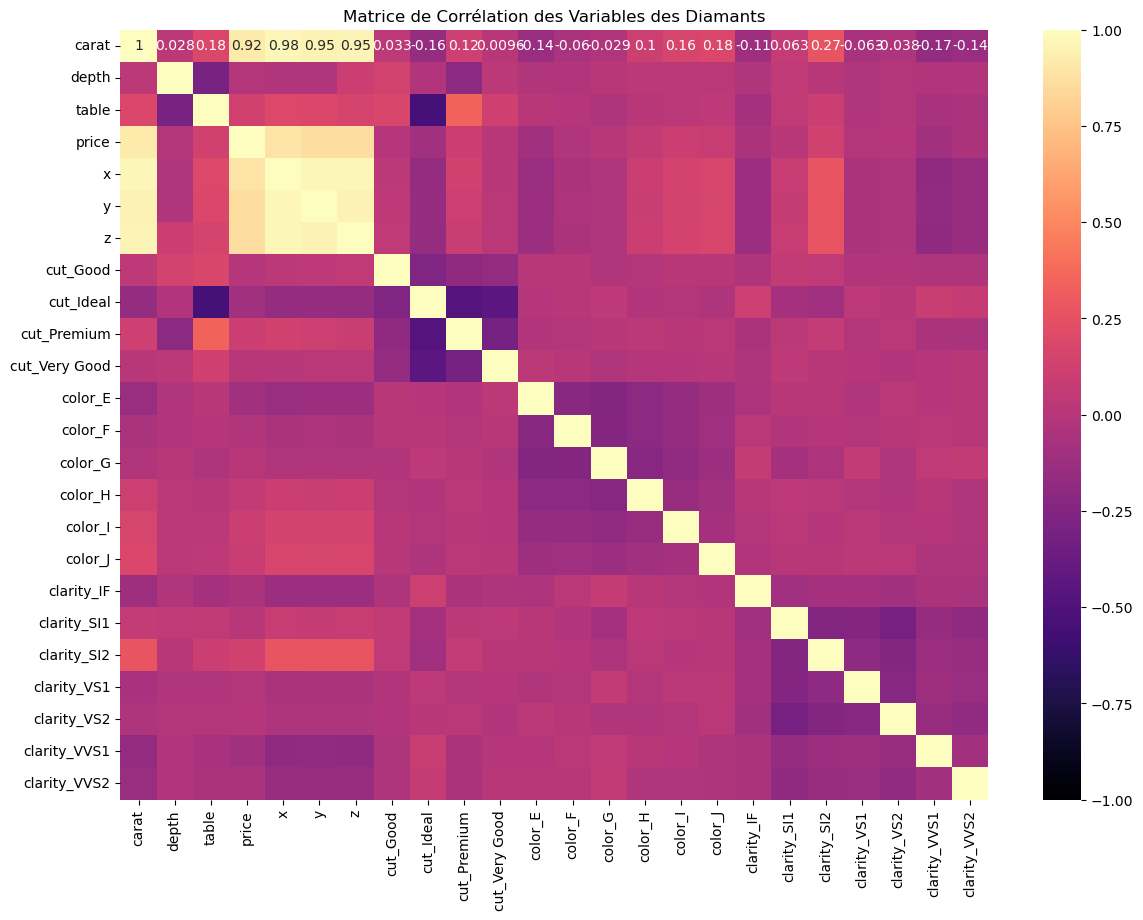

In [19]:
# Tracé de la heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, cmap='magma', annot=True)

# Titre et labels
plt.title('Matrice de Corrélation des Variables des Diamants')
plt.show()

In [ ]:
#sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap='magma', annot=True)

carat, x, y et z sont des quadruplés. 
On ne va garder que carat qui est la plus corrélée avec price.
Meme plus besoin de gérer les outliers dans x,y,z !

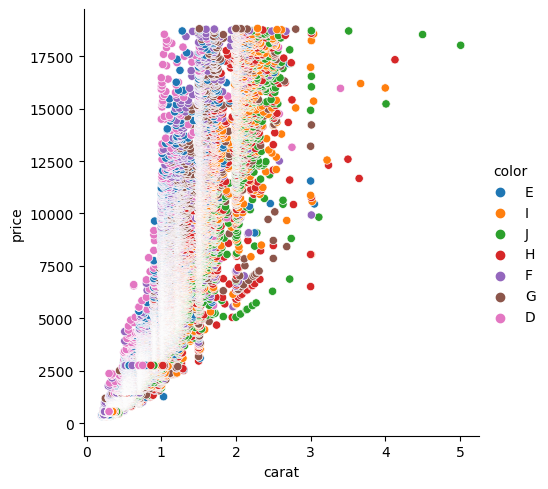

In [20]:
# Prix en fonction du poids, avec l'information couleur en plus :
#sns.relplot(df.carat, df.price, hue=df.color)
sns.relplot(x='carat', y='price', hue='color', data=df)

On aurait pu croire avec les boxplots que D était la pire couleur, mais on voit bien dans le graphique ci-dessus, qu'en fait c'est bien la meilleure, c'est juste que les diamants de cette couleur sont plus petit (carat) dans notre jeu de données.

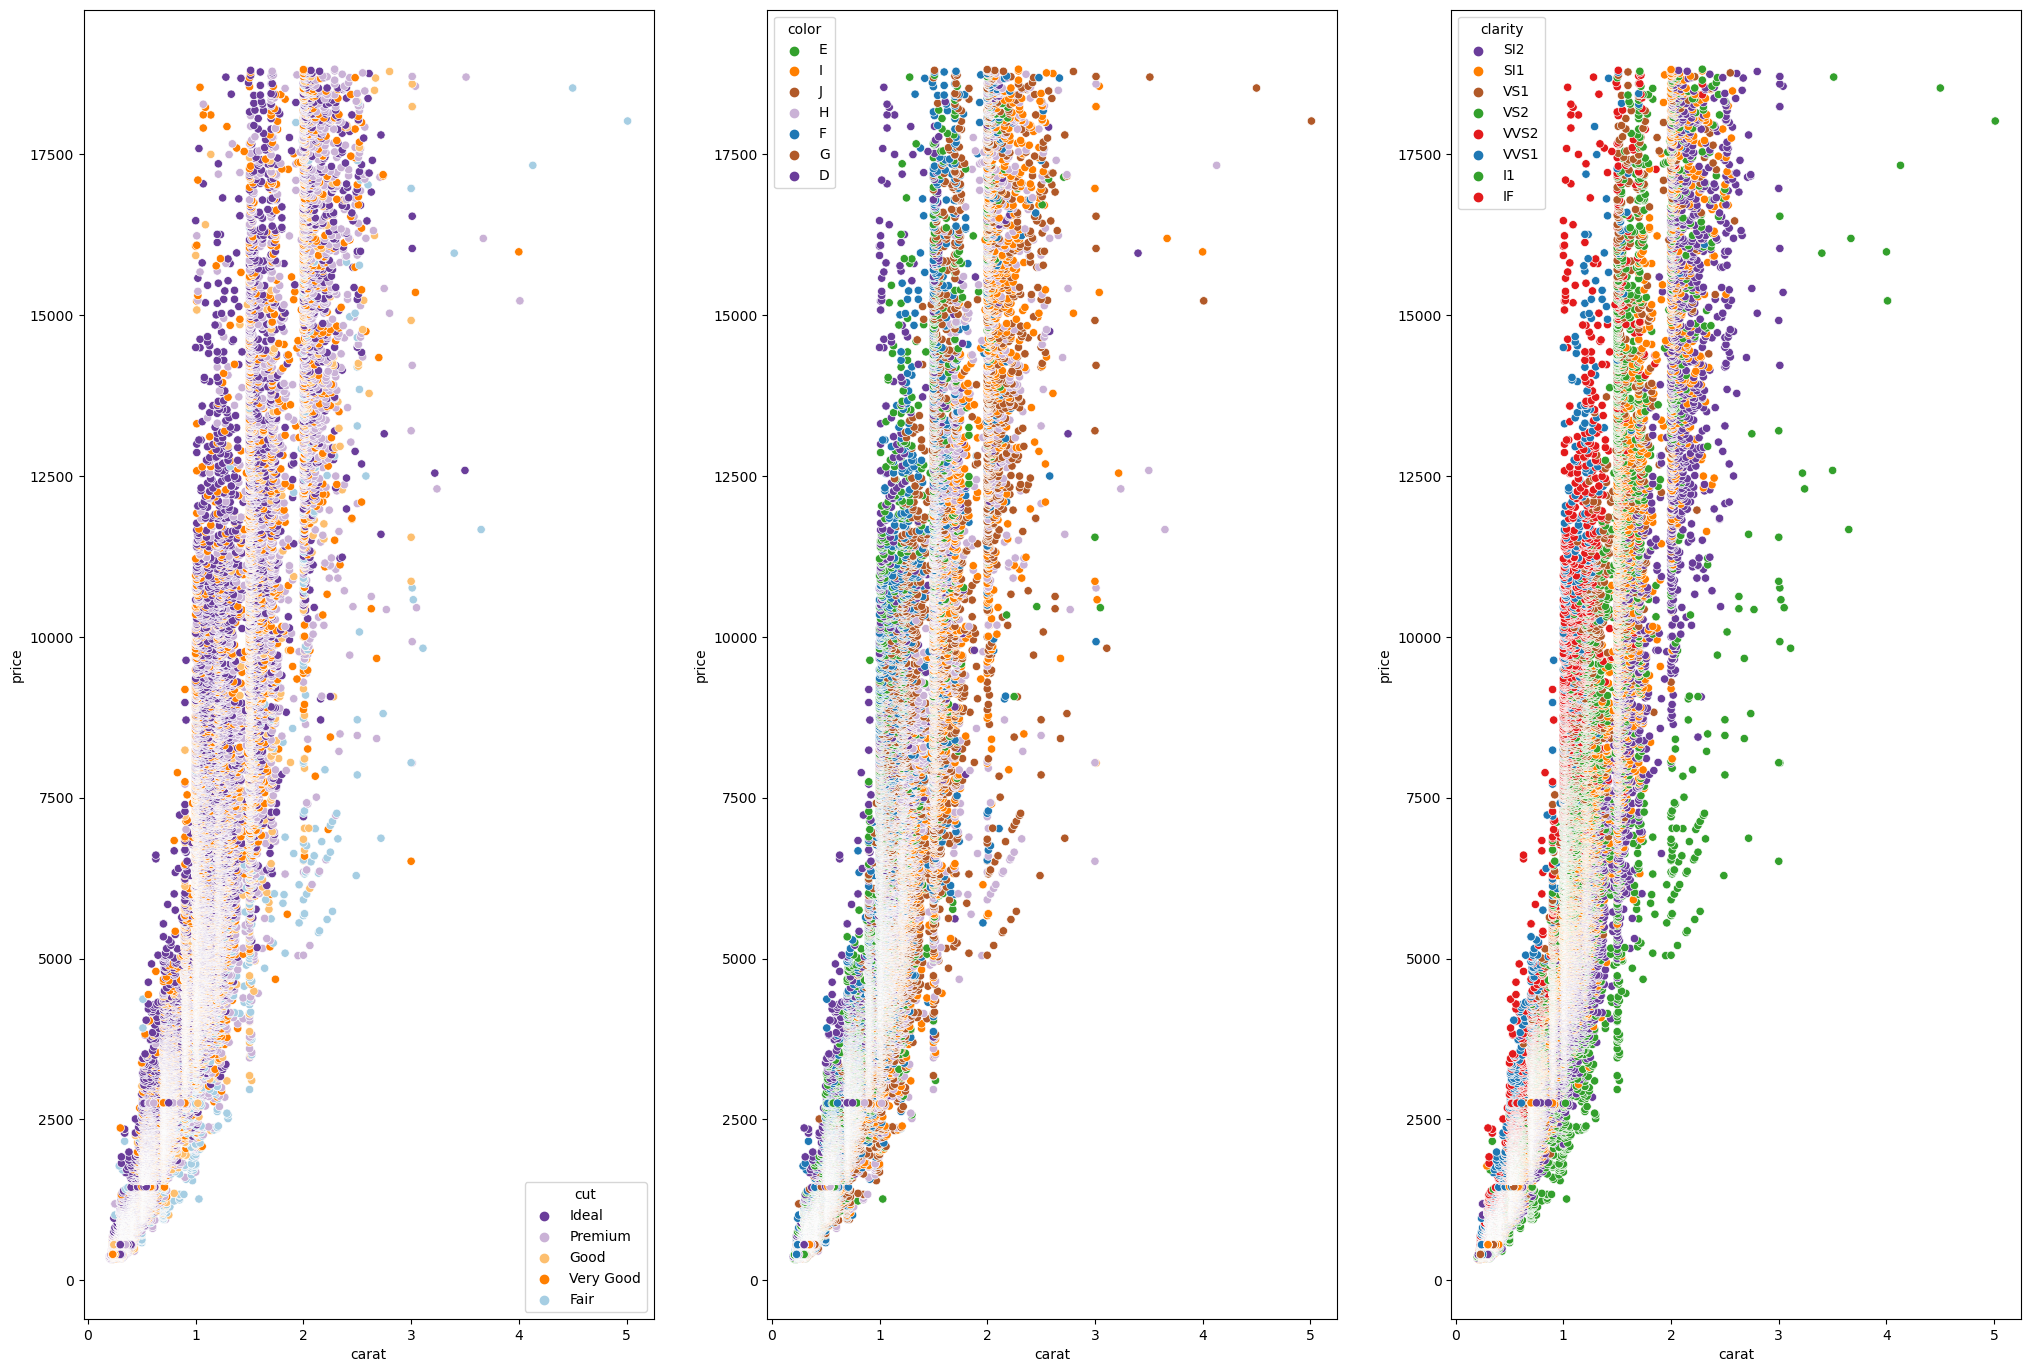

In [21]:
cols = cat_feat
fig = plt.figure(figsize = (25, 17), facecolor='#ffffff')
for i in range(len(cols)):
    fig.add_subplot(1, 3, i+1)
    sns.scatterplot(
        x=df['carat'], y=df['price'], hue=df[cols[i]], 
        palette='Paired', hue_order=df[cols[i]], markers=None
    )
plt.show()

On voit bien sur ces graphiques que les boxplots nous ont un peu induit en erreur, il fallait regarder la relation de nos catégories avec le poids en carrat des diamants pour réellement comprendre leur relation avec le prix.

### Encodage des features qualitatives

Transformer les variables qualitatives de sorte à ce qu'elle soient compréhensibles par un modèle de machine learning.

Pour transformer au mieux vos variables qualitatives, il faut toujours poser la question de savoir si elles sont ordonnées ou non.

In [22]:
# On commence par supprimer x, y et z, nous avons vu que ce sont des copies de carat :
df.drop(['x','y','z'], axis=1, inplace=True)

In [23]:
# Gestion de la qualite de coupe, c'est une info ordonnée, 
# donc on remplace par des labels
cut_map = {'Fair':1, 'Good':2, 'Very Good':3, 
           'Premium':4, 'Ideal':5}
df['cut'] = df['cut'].map(cut_map)
# Meme chose pour la clareté du diamant :
clarity_map = {'I1':1 , 'SI2':2, 'SI1':3, 'VS2':4, 
               'VS1':5, 'VVS2':6, 'VVS1':7, 'IF':8}
df['clarity'] = df['clarity'].map(clarity_map)
# Meme chose pour la couleur du diamant :
color_map = {'D':7 , 'E':6, 'F':5, 'G':4, 'H':3, 'I':2, 'J':1}
df['color'] = df['color'].map(color_map)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53794 entries, 1 to 53940
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53794 non-null  float64
 1   cut      53794 non-null  int64  
 2   color    53794 non-null  int64  
 3   clarity  53794 non-null  int64  
 4   depth    53794 non-null  float64
 5   table    53794 non-null  float64
 6   price    53794 non-null  int64  
dtypes: float64(3), int64(4)
memory usage: 5.3 MB


In [25]:
# On peut ajouter une étape pour préparer les données numériques :
df.price = np.log(df.price)
df.carat = np.log(df.carat)


### Séparation jeu d'entraînement, jeu de test : le bon vieux 70-30

In [26]:
X = df.drop('price', axis=1)
y = df.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)
# On pense toujours a vérifier le bon échantillonage des données :
print("y_train mean price :", y_train.mean())
print("y_test mean price :", y_test.mean())

y_train mean price : 7.782840201335294
y_test mean price : 7.797164289504243


### Modélisation

Testons les différents algorithmes  : **Régression linéaire, SVR, Régression KNN**.

Testons les versions en régressions du **RandomForest** et du **GradientBoosting** (de scikit-learn).


In [27]:
# On creer un dictionnaire pour stocker les performances des modèles
# en prévision de la question suivante :
model_metrics = {}

In [28]:
# Linear Regression
lr = LinearRegression(n_jobs=-1)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print("MSE :", mean_squared_error(y_test, y_pred))
print("R2 :", r2_score(y_test, y_pred))
model_metrics['LinearRegression'] = mean_squared_error(y_test, y_pred)

MSE : 0.021321648956195823
R2 : 0.9793571038483495


In [29]:
# SVR
svr = SVR(kernel='linear')
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)
print("MSE :", mean_squared_error(y_test, y_pred))
print("R2 :", r2_score(y_test, y_pred))
model_metrics['SVR'] = mean_squared_error(y_test, y_pred)

MSE : 0.021365652335852303
R2 : 0.9793145012711081


In [30]:
# RégressionKNN R
knn = KNeighborsRegressor(n_neighbors=7,n_jobs=-1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("MSE :", mean_squared_error(y_test, y_pred))
print("R2 :", r2_score(y_test, y_pred))
model_metrics['KNN'] = mean_squared_error(y_test, y_pred)

MSE : 0.1309734411613699
R2 : 0.8731959638734785


In [31]:
# RF Regressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_jobs=-1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("MSE :", mean_squared_error(y_test, y_pred))
print("R2 :", r2_score(y_test, y_pred))
model_metrics['RandomForest'] = mean_squared_error(y_test, y_pred)

MSE : 0.012331473811499653
R2 : 0.9880610859971215


In [32]:
# GB Regressor
from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor()
gbm.fit(X_train, y_train)
y_pred = gbm.predict(X_test)
print("MSE :", mean_squared_error(y_test, y_pred))
print("R2 :", r2_score(y_test, y_pred))
model_metrics['GBM'] = mean_squared_error(y_test, y_pred)

MSE : 0.011572162101899675
R2 : 0.9887962257979975


### Choisir son modèle

Afficher dans un graphique en barres les MSE de chacun des modèles, le nom du modèle sur l'axe des abscisses, la MSE obtenue sur l'ensemble de test sur l'axe des ordonnées.

Text(0.5, 1.0, 'Model performances, MSE of regressions')

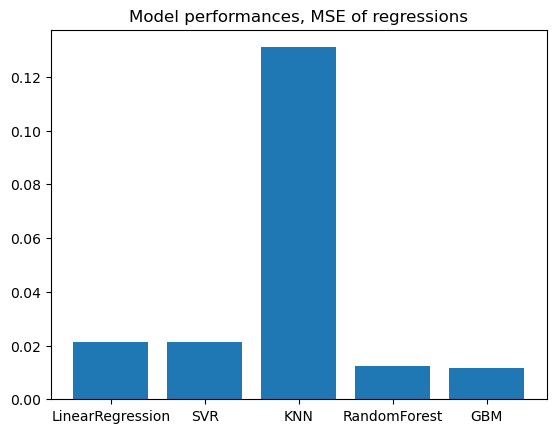

In [33]:
plt.bar(model_metrics.keys(), model_metrics.values())
plt.title("Model performances, MSE of regressions")

Le RandomForest et le GBM semblent être les meilleurs.

C'est normal ce sont les modèles avec la plus grande complexité.

## Optimisation des hyperparamètres & Cross validation

Réalisation de l'optimisation des modèles avec les méthodes vu en cours. Sans oublier d'ajouter les régressions Ridge et LASSO à nos modèles.

(Évitons le parameter tuning sur le GBM de scikit-learn qui est très mal optimisé et qui mettra beaucoup trop de temps à s'exécuter, conservons les paramètres de l'étape précédente pour ce modèle)

Comparons les résultats obtenus dans un graphique.


In [34]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

import scipy

In [ ]:
# Randomized Search with LinearRegression
# Linear Regression
param_grid = {
    "fit_intercept" : [True,False],
    "normalize" : [True,False],
}
lr_grid = RandomizedSearchCV(LinearRegression(), 
                             param_grid, 
                             cv=5, 
                             verbose=1,
                             n_jobs=-1)
lr_grid.fit(X_train, y_train)
lr = lr_grid.best_estimator_
y_pred = lr.predict(X_test)
lr_mse = mean_squared_error(y_test, y_pred)
print("lr best params :" , lr)
print("lr MSE : ", lr_mse)
print("lr r2 : ", r2_score(y_test,y_pred))
model_metrics['LR Optimized'] = lr_mse

In [35]:
# Définir les hyperparamètres à tester
param_grid = {
    "fit_intercept": [True, False],
}

# Configurer RandomizedSearchCV
lr_grid = RandomizedSearchCV(LinearRegression(), 
                             param_distributions=param_grid, 
                             n_iter=10,  # Nombre d'itérations à tester
                             cv=5,       # Nombre de folds pour la validation croisée
                             verbose=1,
                             n_jobs=-1,   # Utiliser tous les cœurs disponibles
                             random_state=42)  # Pour la reproductibilité des résultats

# Ajuster le modèle
lr_grid.fit(X_train, y_train)

# Obtenir le meilleur modèle
lr = lr_grid.best_estimator_

# Faire des prédictions
y_pred = lr.predict(X_test)


Fitting 5 folds for each of 2 candidates, totalling 10 fits


In [36]:
lr_mse = mean_squared_error(y_test, y_pred)
print("lr best params :" , lr)
print("lr MSE : ", lr_mse)
print("lr r2 : ", r2_score(y_test,y_pred))
model_metrics['LR Optimized'] = lr_mse

lr best params : LinearRegression()
lr MSE :  0.021321648956195823
lr r2 :  0.9793571038483495


In [ ]:
# On va passer le SVR, le code ressemble à ça :
param_grid = {
    "kernel" :['rbf', 'sigmoid', 'linear'],
    "tol" :scipy.stats.gamma(0.01),
    "C" :scipy.stats.expon(scale=10)
}
svr_grid = RandomizedSearchCV(SVR(), 
                           param_grid, 
                           cv=5, 
                           verbose=5,
                           n_jobs=-1,
                           n_iter=25)
svr_grid.fit(X_train, y_train)
svr = svr_grid.best_estimator_
y_pred = svr.predict(X_test)
svr_mse = mean_squared_error(y_test, y_pred)
print("svr best params :" , svr)
print("svr MSE : ", svr_mse)
print("svr r2 : ", r2_score(y_test,y_pred))
model_metrics['svr Optimized'] = svr_mse

Fitting 5 folds for each of 25 candidates, totalling 125 fits


In [ ]:
# KNN R
param_grid = {
    "n_neighbors":scipy.stats.randint(3,20),
    "weights" : ["uniform", "distance"]
}

knn_grid = RandomizedSearchCV(KNeighborsRegressor(),
                               param_grid, 
                               cv=5, 
                               verbose=5,
                               n_jobs=-1,
                               n_iter=25)
knn_grid.fit(X_train, y_train)
knn = knn_grid.best_estimator_
y_pred = knn.predict(X_test)
knn_mse = mean_squared_error(y_test, y_pred)
print("knn best params :" , knn)
print("knn MSE : ", knn_mse)
print("knn r2 : ", r2_score(y_test,y_pred))
model_metrics['knn Optimized'] = knn_mse

In [ ]:
# RF Regressor
param_grid = {
    "n_estimators":scipy.stats.randint(50,500),
    "max_leaf_nodes":scipy.stats.randint(5,500),
    "min_samples_split":scipy.stats.randint(1,50),
    "min_samples_leaf":scipy.stats.randint(1,500),
}

rfr_grid = RandomizedSearchCV(RandomForestRegressor(),
                              param_grid,
                              cv=5, 
                              verbose=5,
                              n_jobs=-1,
                              n_iter=25)
rfr_grid.fit(X_train, y_train)
rfr = rfr_grid.best_estimator_
y_pred = rfr.predict(X_test)
rfr_mse = mean_squared_error(y_test, y_pred)
print("rfr best params :" , rfr)
print("rfr MSE : ", rfr_mse)
print("rfr r2 : ", r2_score(y_test,y_pred))
model_metrics['rfr Optimized'] = rfr_mse

In [ ]:
# GBM on passe, beaucoup trop long

In [ ]:
# Ridge
param_grid = {
    "alpha":scipy.stats.uniform(.1,1000),
    "tol" : scipy.stats.expon(scale=.5),
    "normalize": [True,False]
}

ridge_grid = RandomizedSearchCV(Ridge(),
                               param_grid, 
                               cv=5, 
                               verbose=5,
                               n_jobs=-1,
                               n_iter=25)
ridge_grid.fit(X_train, y_train)
                
ridge = ridge_grid.best_estimator_
y_pred = ridge.predict(X_test)
ridge_mse = mean_squared_error(y_test, y_pred)
print("ridge best params :" , ridge)
print("ridge MSE : ", ridge_mse)
print("ridge r2 : ", r2_score(y_test,y_pred))
model_metrics['ridge Optimized'] = ridge_mse

In [ ]:
# Lasso
param_grid = {
    "alpha":scipy.stats.expon(scale=1),
    "tol" : scipy.stats.expon(scale=.5),
    "normalize": [True,False]
}

lasso_grid = RandomizedSearchCV(Lasso(),
                               param_grid, 
                               cv=5, 
                               verbose=5,
                               n_jobs=-1,
                               n_iter=25)
lasso_grid.fit(X_train, y_train)
                
lasso = lasso_grid.best_estimator_
y_pred = lasso.predict(X_test)
lasso_mse = mean_squared_error(y_test, y_pred)
print("lasso best params :" , lasso)
print("lasso MSE : ", lasso_mse)
print("lasso r2 : ", r2_score(y_test,y_pred))
model_metrics['lasso Optimized'] = lasso_mse

---
Optimisation des hyperparamètres d'un Random Forest par recherche Bayesienne avec le framwork Optuna :

In [ ]:
import optuna

# 1. Define an objective function to be maximized.
def objective(trial):
    # 2. Suggest values for the hyperparameters using a trial object.
    classifier_name = trial.suggest_categorical('regressor', ['RandomForest'])
    rf_max_depth = int(trial.suggest_loguniform('rf_max_depth', 2, 32))
    rf_n_estimator = int(trial.suggest_loguniform('rf_n_estimator', 20, 200))
    rf_max_leaf_nodes = int(trial.suggest_loguniform('rf_max_leaf_nodes', 3,100))
    regressor = RandomForestRegressor(max_depth=rf_max_depth, 
                                      n_estimators=rf_n_estimator, 
                                      max_leaf_nodes=rf_max_leaf_nodes,
                                      n_jobs=-1)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    return mean_squared_error(y_test, y_pred)

# 3. Create a study object and optimize the objective function.
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

[I 2021-09-15 11:33:05,690] Trial 27 finished with value: 0.02197525804991102 and parameters: {'regressor': 'RandomForest', 'rf_max_depth': 10.646755960229877, 'rf_n_estimator': 24.02270672460777, 'rf_max_leaf_nodes': 61.50574974430541}. Best is trial 14 with value: 0.01809943872693826.
[I 2021-09-15 11:33:06,107] Trial 28 finished with value: 0.018228378697180126 and parameters: {'regressor': 'RandomForest', 'rf_max_depth': 13.949998658681773, 'rf_n_estimator': 37.80609256347958, 'rf_max_leaf_nodes': 99.00742648215832}. Best is trial 14 with value: 0.01809943872693826.
[I 2021-09-15 11:33:06,726] Trial 29 finished with value: 0.021520790238259292 and parameters: {'regressor': 'RandomForest', 'rf_max_depth': 7.043103206475858, 'rf_n_estimator': 62.81272556812555, 'rf_max_leaf_nodes': 64.40653706372352}. Best is trial 14 with value: 0.01809943872693826.
[I 2021-09-15 11:33:07,163] Trial 30 finished with value: 0.03004237248951182 and parameters: {'regressor': 'RandomForest', 'rf_max_dep

[I 2021-09-15 11:33:19,927] Trial 55 finished with value: 0.020472758013821788 and parameters: {'regressor': 'RandomForest', 'rf_max_depth': 25.64226674774753, 'rf_n_estimator': 26.089256082632982, 'rf_max_leaf_nodes': 71.04102007946754}. Best is trial 14 with value: 0.01809943872693826.
[I 2021-09-15 11:33:21,486] Trial 56 finished with value: 0.0181893163555083 and parameters: {'regressor': 'RandomForest', 'rf_max_depth': 20.919383093069587, 'rf_n_estimator': 181.80767655274929, 'rf_max_leaf_nodes': 97.49793460657175}. Best is trial 14 with value: 0.01809943872693826.
[I 2021-09-15 11:33:23,047] Trial 57 finished with value: 0.02211702172994791 and parameters: {'regressor': 'RandomForest', 'rf_max_depth': 15.062183162854314, 'rf_n_estimator': 197.15746337015418, 'rf_max_leaf_nodes': 59.113268449410896}. Best is trial 14 with value: 0.01809943872693826.
[I 2021-09-15 11:33:24,458] Trial 58 finished with value: 0.01814541774718548 and parameters: {'regressor': 'RandomForest', 'rf_max_d

[I 2021-09-15 11:34:00,500] Trial 83 finished with value: 0.01899590673828617 and parameters: {'regressor': 'RandomForest', 'rf_max_depth': 18.25966177070153, 'rf_n_estimator': 170.0422966552378, 'rf_max_leaf_nodes': 88.76272956288126}. Best is trial 64 with value: 0.018077987600386675.
[I 2021-09-15 11:34:02,094] Trial 84 finished with value: 0.018092312091746464 and parameters: {'regressor': 'RandomForest', 'rf_max_depth': 11.915788450118372, 'rf_n_estimator': 189.948791595971, 'rf_max_leaf_nodes': 99.48969864008389}. Best is trial 64 with value: 0.018077987600386675.
[I 2021-09-15 11:34:03,541] Trial 85 finished with value: 0.02004196579805686 and parameters: {'regressor': 'RandomForest', 'rf_max_depth': 8.222081089614631, 'rf_n_estimator': 187.2830466717512, 'rf_max_leaf_nodes': 76.50924336936315}. Best is trial 64 with value: 0.018077987600386675.
[I 2021-09-15 11:34:04,624] Trial 86 finished with value: 0.01878724875461815 and parameters: {'regressor': 'RandomForest', 'rf_max_dep

In [ ]:
print("Best parameters for study :", study.best_params)
print("Best MSE :", study.best_value)

model_metrics["rfr_grid"] = study.best_value

## BONUS : 

Essayer d'implémenter les modèles LightGBM & CatBoost

In [ ]:
!pip install catboost

In [ ]:
import lightgbm as lgb
import catboost as cb

In [ ]:
# LightGBM :
model = lgb.LGBMRegressor(n_jobs=-1)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

lgb_mse = mean_squared_error(y_test, y_pred)
print("lgb best params :" , lgb)
print("lgb MSE : ", lgb_mse)
print("lgb r2 : ", r2_score(y_test,y_pred))
model_metrics['lgb'] = lgb_mse

plt.scatter(y_test,y_pred)

Même chose avec la librairie catboost : modèles de gradient boosting aussi

In [ ]:
# initialize Pool
train_pool = cb.Pool(X_train, 
                  y_train, 
                  cat_features=["cut","clarity","color"])
test_pool = cb.Pool(X_test, 
                 cat_features=["cut","clarity","color"]) 

# specify the training parameters 
model = cb.CatBoostRegressor(thread_count=-1)
#train the model
model.fit(train_pool)
# make the prediction using the resulting model
y_pred = model.predict(test_pool)

162:	learn: 0.1038490	total: 8.09s	remaining: 41.6s
163:	learn: 0.1037746	total: 8.15s	remaining: 41.6s
164:	learn: 0.1037351	total: 8.2s	remaining: 41.5s
165:	learn: 0.1037081	total: 8.25s	remaining: 41.5s
166:	learn: 0.1036826	total: 8.3s	remaining: 41.4s
167:	learn: 0.1035953	total: 8.35s	remaining: 41.3s
168:	learn: 0.1035530	total: 8.4s	remaining: 41.3s
169:	learn: 0.1035251	total: 8.44s	remaining: 41.2s
170:	learn: 0.1034457	total: 8.49s	remaining: 41.1s
171:	learn: 0.1034285	total: 8.53s	remaining: 41.1s
172:	learn: 0.1034177	total: 8.57s	remaining: 41s
173:	learn: 0.1033833	total: 8.62s	remaining: 40.9s
174:	learn: 0.1033241	total: 8.67s	remaining: 40.9s
175:	learn: 0.1033035	total: 8.71s	remaining: 40.8s
176:	learn: 0.1032925	total: 8.75s	remaining: 40.7s
177:	learn: 0.1032128	total: 8.79s	remaining: 40.6s
178:	learn: 0.1031799	total: 8.84s	remaining: 40.5s
179:	learn: 0.1031387	total: 8.88s	remaining: 40.5s
180:	learn: 0.1030895	total: 8.94s	remaining: 40.5s
181:	learn: 0.103

324:	learn: 0.0984591	total: 15.6s	remaining: 32.4s
325:	learn: 0.0984479	total: 15.6s	remaining: 32.3s
326:	learn: 0.0984248	total: 15.7s	remaining: 32.3s
327:	learn: 0.0984239	total: 15.7s	remaining: 32.2s
328:	learn: 0.0983973	total: 15.8s	remaining: 32.2s
329:	learn: 0.0983726	total: 15.8s	remaining: 32.1s
330:	learn: 0.0983351	total: 15.9s	remaining: 32s
331:	learn: 0.0982973	total: 15.9s	remaining: 32s
332:	learn: 0.0982922	total: 16s	remaining: 32s
333:	learn: 0.0982908	total: 16s	remaining: 31.9s
334:	learn: 0.0982727	total: 16.1s	remaining: 31.9s
335:	learn: 0.0982399	total: 16.2s	remaining: 31.9s
336:	learn: 0.0982084	total: 16.2s	remaining: 31.9s
337:	learn: 0.0981777	total: 16.3s	remaining: 31.9s
338:	learn: 0.0981598	total: 16.3s	remaining: 31.8s
339:	learn: 0.0981244	total: 16.4s	remaining: 31.8s
340:	learn: 0.0980550	total: 16.4s	remaining: 31.7s
341:	learn: 0.0980439	total: 16.4s	remaining: 31.6s
342:	learn: 0.0980156	total: 16.5s	remaining: 31.6s
343:	learn: 0.0979869	

485:	learn: 0.0961931	total: 24.3s	remaining: 25.7s
486:	learn: 0.0961811	total: 24.4s	remaining: 25.7s
487:	learn: 0.0961805	total: 24.5s	remaining: 25.7s
488:	learn: 0.0961725	total: 24.5s	remaining: 25.6s
489:	learn: 0.0961655	total: 24.6s	remaining: 25.6s
490:	learn: 0.0961546	total: 24.6s	remaining: 25.5s
491:	learn: 0.0961425	total: 24.7s	remaining: 25.5s
492:	learn: 0.0961380	total: 24.7s	remaining: 25.4s
493:	learn: 0.0961216	total: 24.7s	remaining: 25.3s
494:	learn: 0.0961145	total: 24.8s	remaining: 25.3s
495:	learn: 0.0960998	total: 24.8s	remaining: 25.2s
496:	learn: 0.0960810	total: 24.9s	remaining: 25.2s
497:	learn: 0.0960726	total: 24.9s	remaining: 25.1s
498:	learn: 0.0960701	total: 25s	remaining: 25.1s
499:	learn: 0.0960424	total: 25s	remaining: 25s
500:	learn: 0.0960320	total: 25.1s	remaining: 25s
501:	learn: 0.0960188	total: 25.2s	remaining: 25s
502:	learn: 0.0959966	total: 25.3s	remaining: 25s
503:	learn: 0.0959887	total: 25.4s	remaining: 25s
504:	learn: 0.0959852	tota

645:	learn: 0.0945914	total: 32.2s	remaining: 17.7s
646:	learn: 0.0945821	total: 32.3s	remaining: 17.6s
647:	learn: 0.0945769	total: 32.3s	remaining: 17.6s
648:	learn: 0.0945750	total: 32.4s	remaining: 17.5s
649:	learn: 0.0945657	total: 32.4s	remaining: 17.5s
650:	learn: 0.0945636	total: 32.5s	remaining: 17.4s
651:	learn: 0.0945605	total: 32.5s	remaining: 17.4s
652:	learn: 0.0945505	total: 32.6s	remaining: 17.3s
653:	learn: 0.0945441	total: 32.6s	remaining: 17.3s
654:	learn: 0.0945340	total: 32.7s	remaining: 17.2s
655:	learn: 0.0945337	total: 32.8s	remaining: 17.2s
656:	learn: 0.0945253	total: 32.8s	remaining: 17.1s
657:	learn: 0.0945231	total: 32.9s	remaining: 17.1s
658:	learn: 0.0945229	total: 32.9s	remaining: 17s
659:	learn: 0.0945173	total: 33s	remaining: 17s
660:	learn: 0.0945083	total: 33s	remaining: 16.9s
661:	learn: 0.0944978	total: 33.1s	remaining: 16.9s
662:	learn: 0.0944976	total: 33.1s	remaining: 16.8s
663:	learn: 0.0944829	total: 33.2s	remaining: 16.8s
664:	learn: 0.094469

804:	learn: 0.0934059	total: 40.8s	remaining: 9.89s
805:	learn: 0.0934034	total: 40.9s	remaining: 9.85s
806:	learn: 0.0933958	total: 41s	remaining: 9.81s
807:	learn: 0.0933895	total: 41.1s	remaining: 9.77s
808:	learn: 0.0933843	total: 41.2s	remaining: 9.72s
809:	learn: 0.0933805	total: 41.2s	remaining: 9.67s
810:	learn: 0.0933725	total: 41.3s	remaining: 9.62s
811:	learn: 0.0933592	total: 41.3s	remaining: 9.56s
812:	learn: 0.0933511	total: 41.4s	remaining: 9.51s
813:	learn: 0.0933454	total: 41.4s	remaining: 9.46s
814:	learn: 0.0933399	total: 41.5s	remaining: 9.41s
815:	learn: 0.0933371	total: 41.5s	remaining: 9.36s
816:	learn: 0.0933230	total: 41.5s	remaining: 9.31s
817:	learn: 0.0933145	total: 41.6s	remaining: 9.26s
818:	learn: 0.0933067	total: 41.7s	remaining: 9.21s
819:	learn: 0.0932937	total: 41.7s	remaining: 9.16s
820:	learn: 0.0932906	total: 41.8s	remaining: 9.1s
821:	learn: 0.0932869	total: 41.8s	remaining: 9.05s
822:	learn: 0.0932847	total: 41.8s	remaining: 9s
823:	learn: 0.0932

965:	learn: 0.0923452	total: 48.6s	remaining: 1.71s
966:	learn: 0.0923370	total: 48.7s	remaining: 1.66s
967:	learn: 0.0923368	total: 48.8s	remaining: 1.61s
968:	learn: 0.0923284	total: 48.8s	remaining: 1.56s
969:	learn: 0.0923205	total: 48.8s	remaining: 1.51s
970:	learn: 0.0923187	total: 48.9s	remaining: 1.46s
971:	learn: 0.0923187	total: 48.9s	remaining: 1.41s
972:	learn: 0.0923184	total: 49s	remaining: 1.36s
973:	learn: 0.0923128	total: 49s	remaining: 1.31s
974:	learn: 0.0923064	total: 49.1s	remaining: 1.26s
975:	learn: 0.0923015	total: 49.1s	remaining: 1.21s
976:	learn: 0.0922957	total: 49.2s	remaining: 1.16s
977:	learn: 0.0922913	total: 49.2s	remaining: 1.11s
978:	learn: 0.0922822	total: 49.3s	remaining: 1.06s
979:	learn: 0.0922686	total: 49.3s	remaining: 1.01s
980:	learn: 0.0922635	total: 49.4s	remaining: 957ms
981:	learn: 0.0922595	total: 49.4s	remaining: 906ms
982:	learn: 0.0922568	total: 49.5s	remaining: 857ms
983:	learn: 0.0922552	total: 49.6s	remaining: 807ms
984:	learn: 0.09

In [ ]:
y_pred=model.predict(test_pool)

catboost_mse = mean_squared_error(y_test, y_pred)
print("catboost best params :" , model)
print("catboost MSE : ", catboost_mse)
print("catboost r2 : ", r2_score(y_test,y_pred))
model_metrics['catboost'] = catboost_mse

plt.scatter(y_test,y_pred)

In [ ]:
model_metrics

In [ ]:
# Affichage pas terrible, on passe en barres horizontal :
plt.barh(list(model_metrics.keys()), model_metrics.values())
plt.title("Model performances, MSE of regressions")

## Catboost et LightGBM les grand vainqueurs et sans optimisation d'hyperparamètres